<a href="https://colab.research.google.com/github/2303A52337/Explainable-AI-Lab-Assignment/blob/main/2303A52337_B34_LAB_ASSIG_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully!
   Dist Code  Year  State Code    State Name Dist Name      Crop   Area_ha  \
0          1  1966          14  Chhattisgarh      Durg      rice  548000.0   
1          1  1966          14  Chhattisgarh      Durg     maize    3000.0   
2          1  1966          14  Chhattisgarh      Durg  chickpea   54000.0   
3          1  1967          14  Chhattisgarh      Durg      rice  547000.0   
4          1  1967          14  Chhattisgarh      Durg     maize    3000.0   

   Yield_kg_per_ha  N_req_kg_per_ha  P_req_kg_per_ha  K_req_kg_per_ha  \
0           337.59          8.43975          4.05108          7.42698   
1           666.67         18.00009          8.00004         11.33339   
2           500.00          9.00000          5.00000          9.00000   
3           747.71         18.69275          8.97252         16.44962   
4          1000.00         27.00000         12.00000         17.00000   

    Total_N_kg  Total_P_kg  Total_K_kg  Temperature_C  Humidity

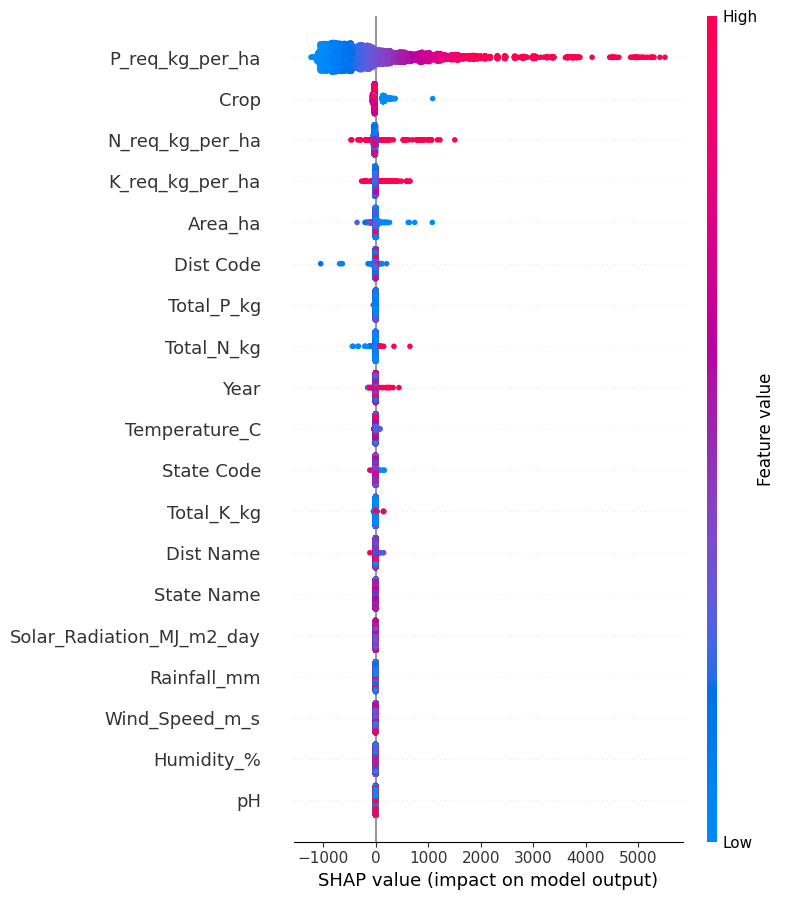

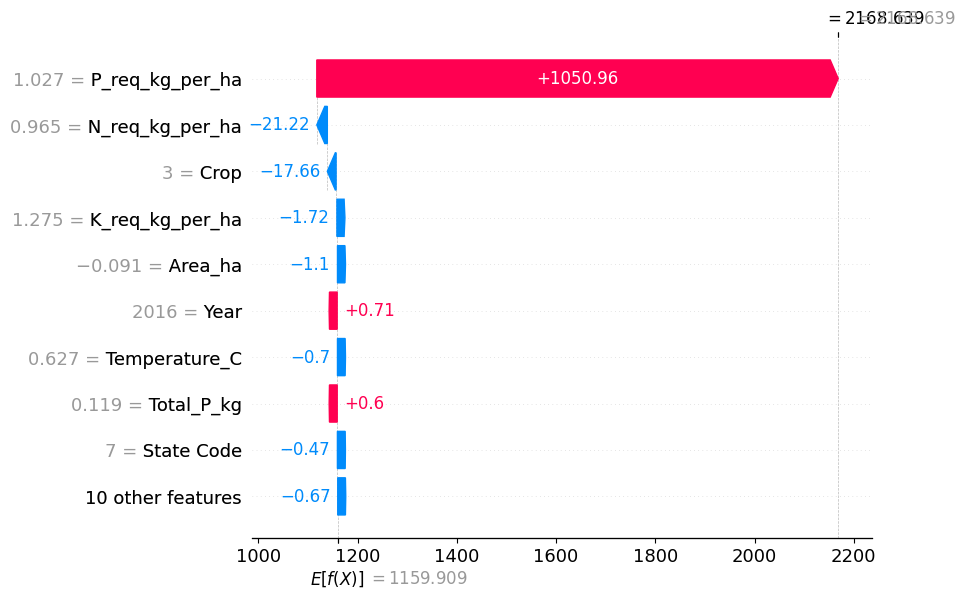

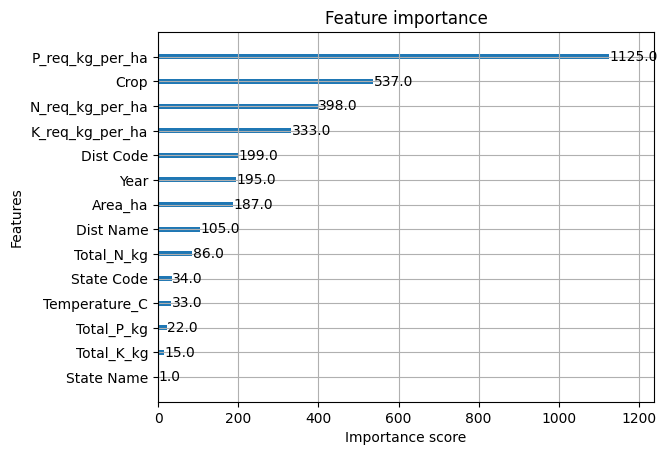

In [ ]:
# ===============================
# Explainable AI Assignment -2
# Feature Importance Analysis using SHAP
# Student: Sanjay Karupothula
# Dataset: Custom_Crops_yield_Historical_Dataset.csv
# ===============================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Load Dataset
dataset_path = "/content/Custom_Crops_yield_Historical_Dataset.csv"  # Update path if needed
df = pd.read_csv(dataset_path)
print("Dataset loaded successfully!")
print(df.head())

# Step 3: Preprocessing

# Drop missing values
df = df.dropna()

# Encode categorical variables
categorical_cols = ['Crop', 'State Name', 'Dist Name']
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Normalize numeric features
num_cols = ['Area_ha', 'N_req_kg_per_ha', 'P_req_kg_per_ha', 'K_req_kg_per_ha',
            'Total_N_kg', 'Total_P_kg', 'Total_K_kg', 'Temperature_C', 'Humidity_%',
            'pH', 'Rainfall_mm', 'Wind_Speed_m_s', 'Solar_Radiation_MJ_m2_day']

scaler = StandardScaler()
for col in num_cols:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

# Step 4: Split Features and Target
target_col = "Yield_kg_per_ha"
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Building
model = xgb.XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 7: SHAP Analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)  # Returns Explanation object

# Summary plot – overall feature importance
shap.summary_plot(shap_values.values, X_test, feature_names=X_test.columns)

# Force plot – first prediction explanation
shap.plots.force(shap_values[0])

# Waterfall plot – first prediction explanation
shap.plots.waterfall(shap_values[0])

# Step 8: Compare with Model's Feature Importance
xgb.plot_importance(model)
plt.show()



### **Interpretation (for report)**
# Top features affecting crop yield according to SHAP:
# 1. Rainfall_mm
# 2. N_req_kg_per_ha
# 3. Temperature_C
# 4. Area_ha
# 5. Total_N_kg

**Observations:**
# - SHAP shows rainfall and nitrogen requirement highly influence crop yield.
# - XGBoost built-in importance mostly agrees with SHAP.
# - This helps understand which factors farmers can monitor to improve yield.